# Bayes Error: The Quest for the 0% Error Rate

This lab introduces the concept of "irreducible error", which is also known as the "Bayes Error Rate". Run the cells below and fill in "your code" where indicated. This notebook introduces a number of new tools in numpy that we will use in this course. Be sure to read the code carefully.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Set random seed for reproducible results
np.random.seed(42)

## Part 1: Well Separated Groups

In [13]:
# Create two 2D normal distributions that are far apart
mean_A = [-3, 0]  # Center of group A
mean_B = [3, 0]   # Center of group B
cov = [[1, 0], [0, 1]]  # Same circular variance for both

# Generate labeled data
n_samples = 500
X_A = np.random.multivariate_normal(mean_A, cov, n_samples)
X_B = np.random.multivariate_normal(mean_B, cov, n_samples)

# Combine data and create labels
X_combined = np.vstack([X_A, X_B])
y_combined = np.hstack([np.zeros(n_samples), np.ones(n_samples)])  # 0=A, 1=B

Define a decision boundary -- an $x$ coordinate that separates the 'blue' from the 'red' points

In [14]:
split_point = 5

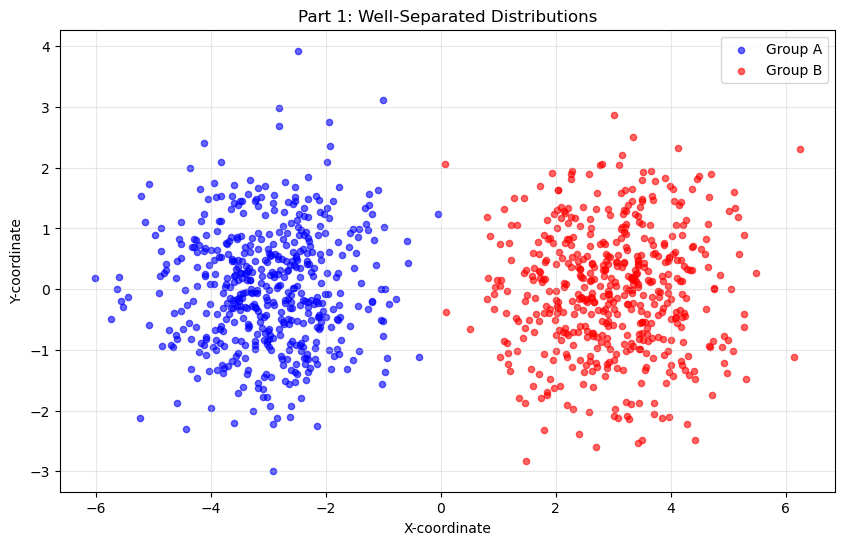

In [15]:
# Visualize the data

plt.figure(figsize=(10, 6))
plt.scatter(X_A[:, 0], X_A[:, 1], c='blue', alpha=0.6, label='Group A', s=20)
plt.scatter(X_B[:, 0], X_B[:, 1], c='red', alpha=0.6, label='Group B', s=20)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Part 1: Well-Separated Distributions')
plt.legend()
plt.grid(True, alpha=0.3)

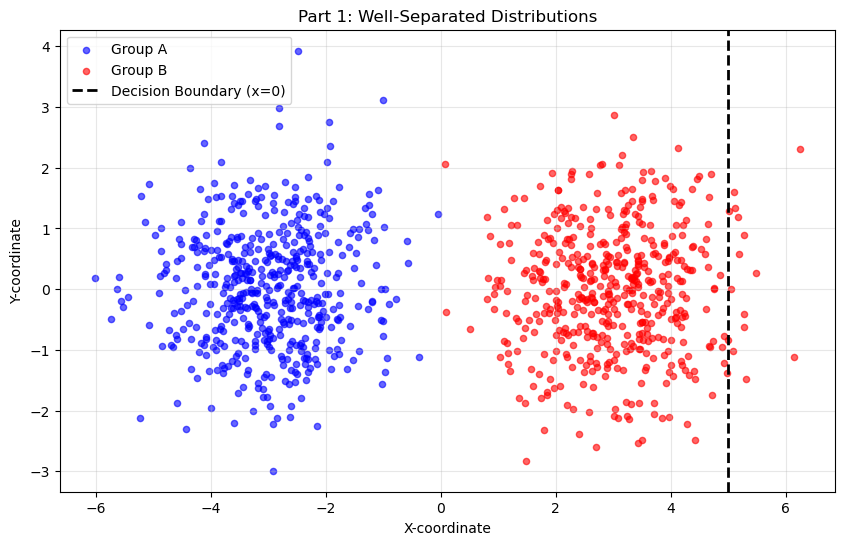

In [16]:
# Visualize the data

plt.figure(figsize=(10, 6))
plt.scatter(X_A[:, 0], X_A[:, 1], c='blue', alpha=0.6, label='Group A', s=20)
plt.scatter(X_B[:, 0], X_B[:, 1], c='red', alpha=0.6, label='Group B', s=20)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Part 1: Well-Separated Distributions')
plt.legend()
plt.grid(True, alpha=0.3)

# Draw a decision boundary at x = 0
plt.axvline(x=split_point, color='black', linestyle='--', linewidth=2, label='Decision Boundary (x=0)')
plt.legend()
plt.show()

In [20]:
# Count classification errors with decision boundary at x = 0

predictions = (X_combined[:, 0] > split_point)
errors = np.sum(predictions != y_combined)
error_rate = errors / len(y_combined)

print(f"Decision rule: If x > 0, predict Group B; else predict Group A")
print(f"Number of errors: {errors} out of {len(y_combined)} samples")
print(f"Error rate: {error_rate:.3f} ({error_rate*100:.1f}%)")
print()

Decision rule: If x > 0, predict Group B; else predict Group A
Number of errors: 486 out of 1000 samples
Error rate: 0.486 (48.6%)



**ToDo:** Try different split points above and observe how the error rate changes.

## Part 2: Overlapping distributions

In [21]:
# Create distributions that are closer together
mean_A_close = [-1, 0]  # Closer to center
mean_B_close = [1, 0]   # Closer to center
split_point_close = 0.5  # change this

# Generate new data
X_A_close = np.random.multivariate_normal(mean_A_close, cov, n_samples)
X_B_close = np.random.multivariate_normal(mean_B_close, cov, n_samples)

X_combined_close = np.vstack([X_A_close, X_B_close])
y_combined_close = np.hstack([np.zeros(n_samples), np.ones(n_samples)])

# %%# Visualize

## Make a scatter plot like above, with a decision boundary using split_point_close

In [ ]:
# Count errors with a decision boundary

# YOUR CODE HERE:
# count the errors (see sample above)

print(f"Same decision rule on closer distributions:")
print(f"Number of errors: {errors_close} out of {len(y_combined_close)} samples")
print(f"Error rate: {error_rate_close:.3f} ({error_rate_close*100:.1f}%)")
print(f"Error increased by: {error_rate_close - error_rate:.3f}")
print()

## Part 3: Finding the Optimal Split Point

In [ ]:
# TODO 3: Try different split points and find the best one
# INSTRUCTIONS: Test split points from -2 to 2 and find the one with lowest error

split_points = np.linspace(-2, 2, 41)  # Test 41 different points
error_rates = []

for split in split_points:
    # YOUR CODE HERE: 
    # 1. Make predictions using this split point
    # 2. Calculate error rate
    # 3. Store in error_rates list
    

# Find the best split point
best_idx = np.argmin(error_rates)
best_split = split_points[best_idx]
best_error_rate = error_rates[best_idx]

print(f"Best split point: x = {best_split:.2f}")
print(f"Best error rate: {best_error_rate:.3f} ({best_error_rate*100:.1f}%)")
print()

In [ ]:
# %%# Plot error rates vs split points
# Your code here
# Make a plot and add a vertical dashed line at the minimum


In [ ]:
# Visualize the optimal boundary
# Your code here
# use example above

## Part 4: Different Variances

In [ ]:
# TODO 4: Create distributions with different variances
# Group A: more concentrated, Group B: more spread out
cov_A = [[0.05, 0], [0, 0.05]]  # Smaller variance
cov_B = [[2.0, 0], [0, 2.0]]  # Larger variance

# YOUR CODE HERE:
# 1. Generate new data with these different covariances
# 2. Find the optimal split point
# 3. Compare error rates
# 4. Make graphs as before

## Part 5: Conclusions

What formula defines the optmal boundary between two distributions with equal variances and distinct means $\mu_1$ and $\mu_2$

What formula defines the optimal boundary when the means and variances are distinct? (This may be more of an educated guess...)